In [1]:
import pandas as pd
import numpy as np

In [2]:
# https://kosis.kr/statHtml/statHtml.do?orgId=101&tblId=DT_1BPA001
# 연령별 인구 추정


In [3]:
dt = pd.read_csv('./pop_structure.csv')

In [4]:
dt

,year,2023_entire,2065_entire,2023_male,2065_male,2023_female,2065_female
0,0_4,"1,374,609","921,971","704,930","472,691","669,679","449,280"
1,5_9,"2,024,713","919,405","1,037,417","470,795","987,296","448,610"
2,10_14,"2,286,695","1,079,623","1,175,485","552,429","1,111,210","527,194"
3,15_19,"2,281,595","1,291,884","1,178,494","659,713","1,103,101","632,171"
4,20_24,"2,914,183","1,514,439","1,527,109","785,303","1,387,074","729,136"
5,25_29,"3,562,623","1,730,814","1,892,488","911,194","1,670,135","819,620"
6,30_34,"3,483,644","1,780,707","1,851,469","931,968","1,632,175","848,739"
7,35_39,"3,322,429","1,543,504","1,729,806","799,873","1,592,623","743,631"
8,40_44,"4,055,406","1,405,632","2,078,374","719,569","1,977,032","686,063"
9,45_49,"3,921,880","1,939,183","1,992,320","988,357","1,929,560","950,826"


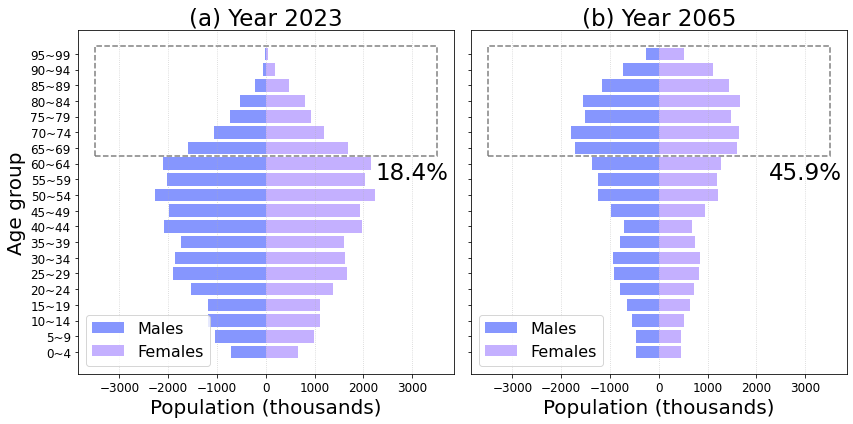

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# assuming dt is a pandas DataFrame
dt = dt.replace(',', '', regex=True)  # Remove commas
dt['year'] = dt['year'].str.replace('_', '~')  # Replace '_' with '~' in 'year' column

# Convert to numeric values
for col in dt.columns[1:]:
    dt[col] = pd.to_numeric(dt[col])

# Get indices for '65~69' and '95~99' age groups
idx_65 = dt[dt['year'] == '65~69'].index[0]
idx_95 = dt[dt['year'] == '95~99'].index[0]

# Create figure and axes
fig, axs = plt.subplots(1, 2, figsize=(12, 6), sharey=True)  

# 2023 Population Pyramid
axs[0].barh(dt['year'], -dt['2023_male']/1000, color='#8696FE', label='Males')
axs[0].barh(dt['year'], dt['2023_female']/1000, color='#C4B0FF', label='Females')
axs[0].set_xlabel('Population (thousands)', fontsize=20)
axs[0].set_ylabel('Age group', fontsize=20)
axs[0].set_title('(a) Year 2023', fontsize=23)
axs[0].legend(fontsize=16, loc='lower left')
axs[0].tick_params(axis='both', which='major', labelsize=12)

# Draw a rectangle and add text for 2023
rectangle = plt.Rectangle((-3500, idx_65-0.5), 7000, idx_95-idx_65+1, fill=False, edgecolor='grey', linestyle='--', lw=1.5)
axs[0].add_patch(rectangle)
axs[0].text(3000, (idx_65+idx_95)/2-5, '18.4%', color='black', ha='center', fontsize=23)
axs[0].grid(axis='x', linestyle=':', alpha=0.6)  # Add gridlines to x-axis

# 2065 Population Pyramid
axs[1].barh(dt['year'], -dt['2065_male']/1000, color='#8696FE', label='Males')
axs[1].barh(dt['year'], dt['2065_female']/1000, color='#C4B0FF', label='Females')
axs[1].set_xlabel('Population (thousands)', fontsize=20)
axs[1].set_title('(b) Year 2065', fontsize=23)
axs[1].legend(fontsize=16)
axs[1].tick_params(axis='both', which='major', labelsize=12)

# Draw a rectangle and add text for 2065
rectangle = plt.Rectangle((-3500, idx_65-0.5), 7000, idx_95-idx_65+1, fill=False, edgecolor='grey', linestyle='--', lw=1.5)
axs[1].add_patch(rectangle)
axs[1].text(3000, (idx_65+idx_95)/2-5, '45.9%', color='black', ha='center', fontsize=23)
axs[1].grid(axis='x', linestyle=':', alpha=0.6)  # Add gridlines to x-axis

# Display the plot
plt.tight_layout()
plt.savefig("./pop.eps", format="eps", bbox_inches="tight")
plt.show()
